# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('D:/Angie/azubi/programming/week7/titanic-231005-181053.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [4]:
# Check for null values
null_values = df_titanic.isnull().sum()
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [5]:
# Clean up currency fields
df_titanic['Fare'] = df_titanic['Fare'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [6]:
# Check statistics of numeric columns
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived']
numeric_stats = df_titanic[numeric_cols].describe()

# Print statistics of numeric columns
print(numeric_stats)

              Age       SibSp       Parch        Fare    Survived
count  714.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208    0.383838
std     14.526497    1.102743    0.806057   49.693429    0.486592
min      0.420000    0.000000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400    0.000000
50%     28.000000    0.000000    0.000000   14.454200    0.000000
75%     38.000000    1.000000    0.000000   31.000000    1.000000
max     80.000000    8.000000    6.000000  512.329200    1.000000


### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

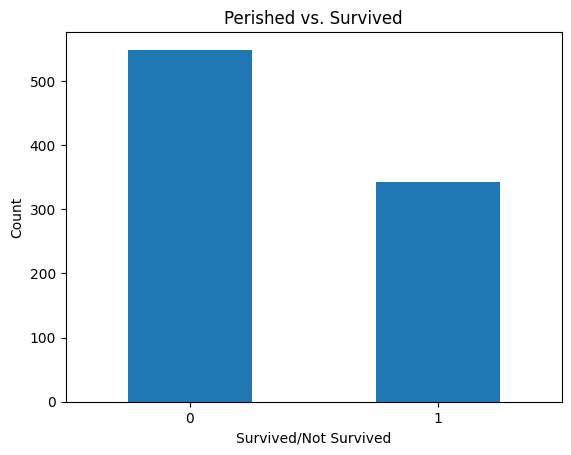

In [7]:
import matplotlib.pyplot as plt
# Group the data by the 'Survived' column and count the number of occurrences
survival_counts = df_titanic.groupby('Survived').size()

# Plot a bar chart of the survival counts
ax = survival_counts.plot.bar(rot=0)

# Set the title and axis labels
ax.set_title('Perished vs. Survived')
ax.set_xlabel('Survived/Not Survived')
ax.set_ylabel('Count')

# Show the plot
plt.show()

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

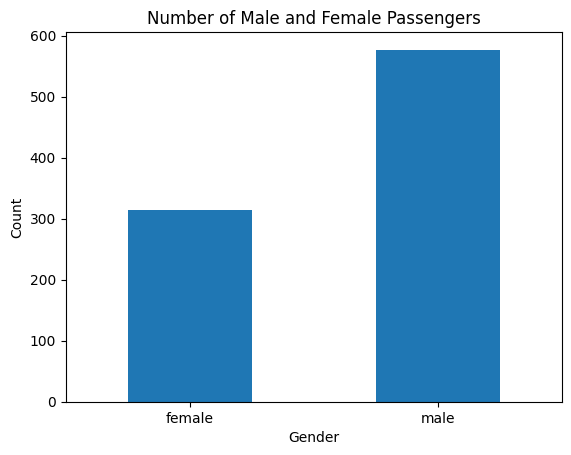

In [8]:
# Group the data by the 'Sex' column and count the number of occurrences
gender_counts = df_titanic.groupby('Sex').size()

# Plot a bar chart of the gender counts
ax = gender_counts.plot.bar(rot=0)

# Set the title and axis labels
ax.set_title('Number of Male and Female Passengers')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Show the plot
plt.show()

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [9]:
# Group the data by the 'Sex' column and calculate the mean of the 'Survived' column
survival_rate = df_titanic.groupby('Sex')['Survived'].mean()

# Print the survival rate of male and female passengers
print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


##### Task7: Plot Perished vs. Survived Bar for Male and Femail
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

In [10]:
import seaborn as sns

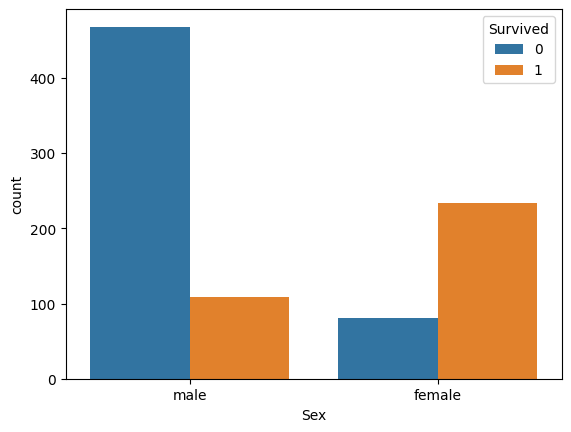

In [11]:
# Filter the dataset to include only male and female passengers
bartplt = df_titanic[df_titanic['Sex'].isin(['male', 'female'])]

# Create a countplot with hue set to 'Survived'
sns.countplot(x='Sex', hue='Survived', data=df_titanic)

# Show the plot
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [12]:
# Calculate the survival rate for each passenger class
survival_rates = df_titanic.groupby('Pclass')['Survived'].mean()

# Print the survival rates for each passenger class
print(survival_rates)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


##### Task 9: Plot Perished vs. Survived for each Pclass

Text(0, 0.5, 'Number of passengers')

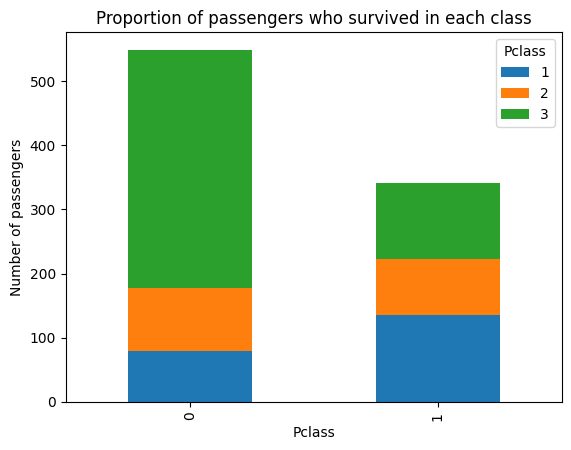

In [13]:
# Group the data by 'Survived' and 'Pclass' columns and count the number of passengers in each group
grouped_data = df_titanic.groupby(['Survived', 'Pclass']).size().unstack()

# Plot the grouped data as a stacked bar chart
grouped_data.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Proportion of passengers who survived in each class')
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

Text(0, 0.5, 'Frequency')

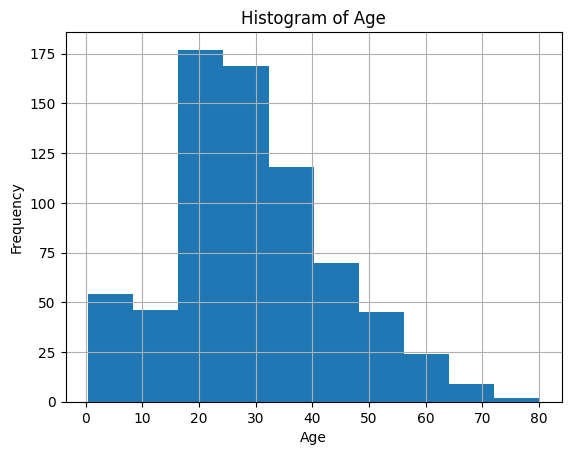

In [14]:
# Plot a histogram of the 'Age' column
df_titanic['Age'].hist()

# Set the title and axis labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

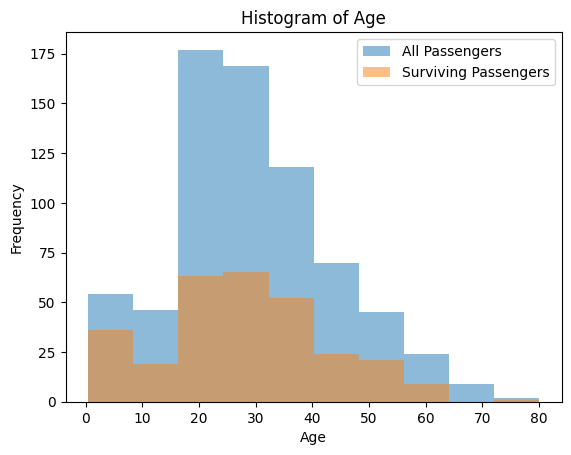

In [15]:
# Plot a histogram of the 'Age' column for all passengers
plt.hist(df_titanic['Age'], bins=10, alpha=0.5, label='All Passengers')

# Filter the data to include only passengers who survived
survived = df_titanic[df_titanic['Survived'] == 1]

# Plot a histogram of the 'Age' column for surviving passengers on the same axis
plt.hist(survived['Age'], bins=10, alpha=0.5, label='Surviving Passengers')

# Set the title and axis labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend(loc='upper right')

# Show the plot
plt.show()

Children have higher survival rate.

[Back to Top](#Table-of-Contents)
